In [1]:
#运行所有单元直到运行到最后一单元时打开http://127.0.0.1:8050/ 然后稍等一会直到显示出所有数据(此时已通过同文件夹下的pdf_to_csv.ipynb完成pdf转换)

In [2]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go
from dash.dependencies import Input, Output         
from jupyter_plotly_dash import JupyterDash         
from pandas_datareader import data as web
from datetime import datetime as dt  
import plotly_express as px
from PIL import Image

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.animation import FuncAnimation
from matplotlib import font_manager
from IPython.display import HTML
import jieba
from wordcloud import WordCloud

In [4]:
path="D:\python\pandas-videos-master\data\\ufo.csv"
ufo=pd.read_csv(path)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [5]:
ufo['Colors Reported'].unique()

array([nan, 'RED', 'GREEN', 'BLUE', 'ORANGE', 'YELLOW', 'ORANGE YELLOW',
       'RED GREEN', 'RED BLUE', 'RED ORANGE', 'RED GREEN BLUE',
       'RED YELLOW GREEN', 'RED YELLOW', 'GREEN BLUE',
       'ORANGE GREEN BLUE', 'ORANGE GREEN', 'YELLOW GREEN',
       'RED YELLOW BLUE', 'ORANGE BLUE', 'RED YELLOW GREEN BLUE',
       'YELLOW GREEN BLUE', 'RED ORANGE YELLOW', 'RED ORANGE YELLOW BLUE',
       'YELLOW BLUE', 'RED ORANGE GREEN', 'RED ORANGE BLUE',
       'ORANGE YELLOW GREEN', 'ORANGE YELLOW BLUE'], dtype=object)

In [6]:
plt.rcParams['font.sans-serif'] = ['KaiTi']
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [7]:
ufo.Time=pd.to_datetime(ufo.Time)
ufo['Time'].head()

0   1930-06-01 22:00:00
1   1930-06-30 20:00:00
2   1931-02-15 14:00:00
3   1931-06-01 13:00:00
4   1933-04-18 19:00:00
Name: Time, dtype: datetime64[ns]

In [8]:
ufo=ufo.set_index('Time')
ufo.head()

,City,Colors Reported,Shape Reported,State
Time,,,,
1930-06-01 22:00:00,Ithaca,NaN,TRIANGLE,NY
1930-06-30 20:00:00,Willingboro,NaN,OTHER,NJ
1931-02-15 14:00:00,Holyoke,NaN,OVAL,CO
1931-06-01 13:00:00,Abilene,NaN,DISK,KS
1933-04-18 19:00:00,New York Worlds Fair,NaN,LIGHT,NY


In [9]:
ufo.sort_index(ascending=True).head()

,City,Colors Reported,Shape Reported,State
Time,,,,
1930-06-01 22:00:00,Ithaca,NaN,TRIANGLE,NY
1930-06-30 20:00:00,Willingboro,NaN,OTHER,NJ
1931-02-15 14:00:00,Holyoke,NaN,OVAL,CO
1931-06-01 13:00:00,Abilene,NaN,DISK,KS
1933-04-18 19:00:00,New York Worlds Fair,NaN,LIGHT,NY


In [10]:
ufo_months=ufo.resample("BM").size()
len(ufo_months.index)

848

In [11]:
ufo_years=ufo.resample("5A").size()
ufo_years.head()

Time
1930-12-31      2
1935-12-31      5
1940-12-31      7
1945-12-31     27
1950-12-31    108
Freq: 5A-DEC, dtype: int64

In [12]:
ufo_open=ufo_years.reset_index()

In [13]:
ufo_open["year"]=ufo_open["Time"].dt.year

In [14]:
ufo_open=ufo_open.rename(columns={0:"num"})

In [15]:
def f1(x,a,b,c,d):
    return a * np.power(b, c * (x-1920)) + d

In [16]:
def f2(x,a,b,c):
    return a*(x-1920)*(x-1920)+b*x+c

In [17]:
x_array=np.array(ufo_open.year)

In [18]:
popt_f1, pcov_f1 = curve_fit(f1,x_array, np.array(ufo_open.num))
a_f1 = popt_f1[0]
b_f1 = popt_f1[1]
c_f1 = popt_f1[2]
d_f1 = popt_f1[3]


In [19]:
popt_f2,pcov_f2=curve_fit(f2,x_array,np.array(ufo_open.num))
a_f2=popt_f2[0]
b_f2=popt_f2[1]
c_f2=popt_f2[2]

In [20]:
yvals_f1=f1(x_array,a_f1,b_f1,c_f1,d_f1)

In [21]:
yvals_f2=f2(x_array,a_f2,b_f2,c_f2)

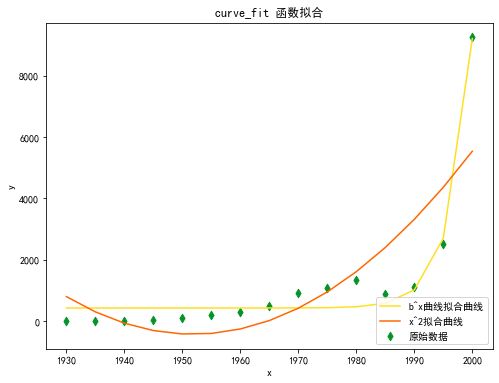

In [22]:
figure5 = plt.figure(figsize=(8,6))
plt.plot(x_array, yvals_f1, color="#ffdf22", label='b^x曲线拟合曲线')
plt.plot(x_array,yvals_f2,color="#FF6600",label="x^2拟合曲线")
plt.scatter(x_array, np.array(ufo_open.num), color='#019529', marker="d", label='原始数据')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=4) 
plt.title('curve_fit 函数拟合')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.show()

In [23]:
ufo_where=ufo.groupby("State").size()
ufo_where.head()

State
AK     116
AL     193
AR     206
AZ     738
CA    2529
dtype: int64

In [24]:
ufo_where=ufo_where.sort_values(ascending=False)

In [25]:
ufo_where=ufo_where[ufo_where.index!='Ca']

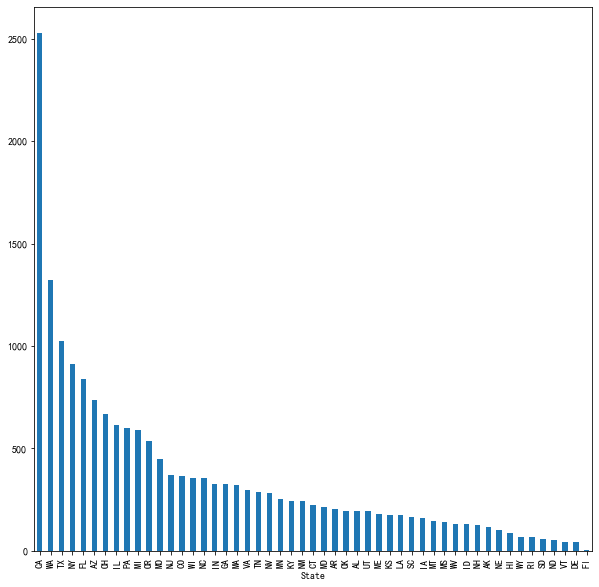

In [26]:
plt.figure(figsize=(10,10))
ufo_where.plot(kind="bar")

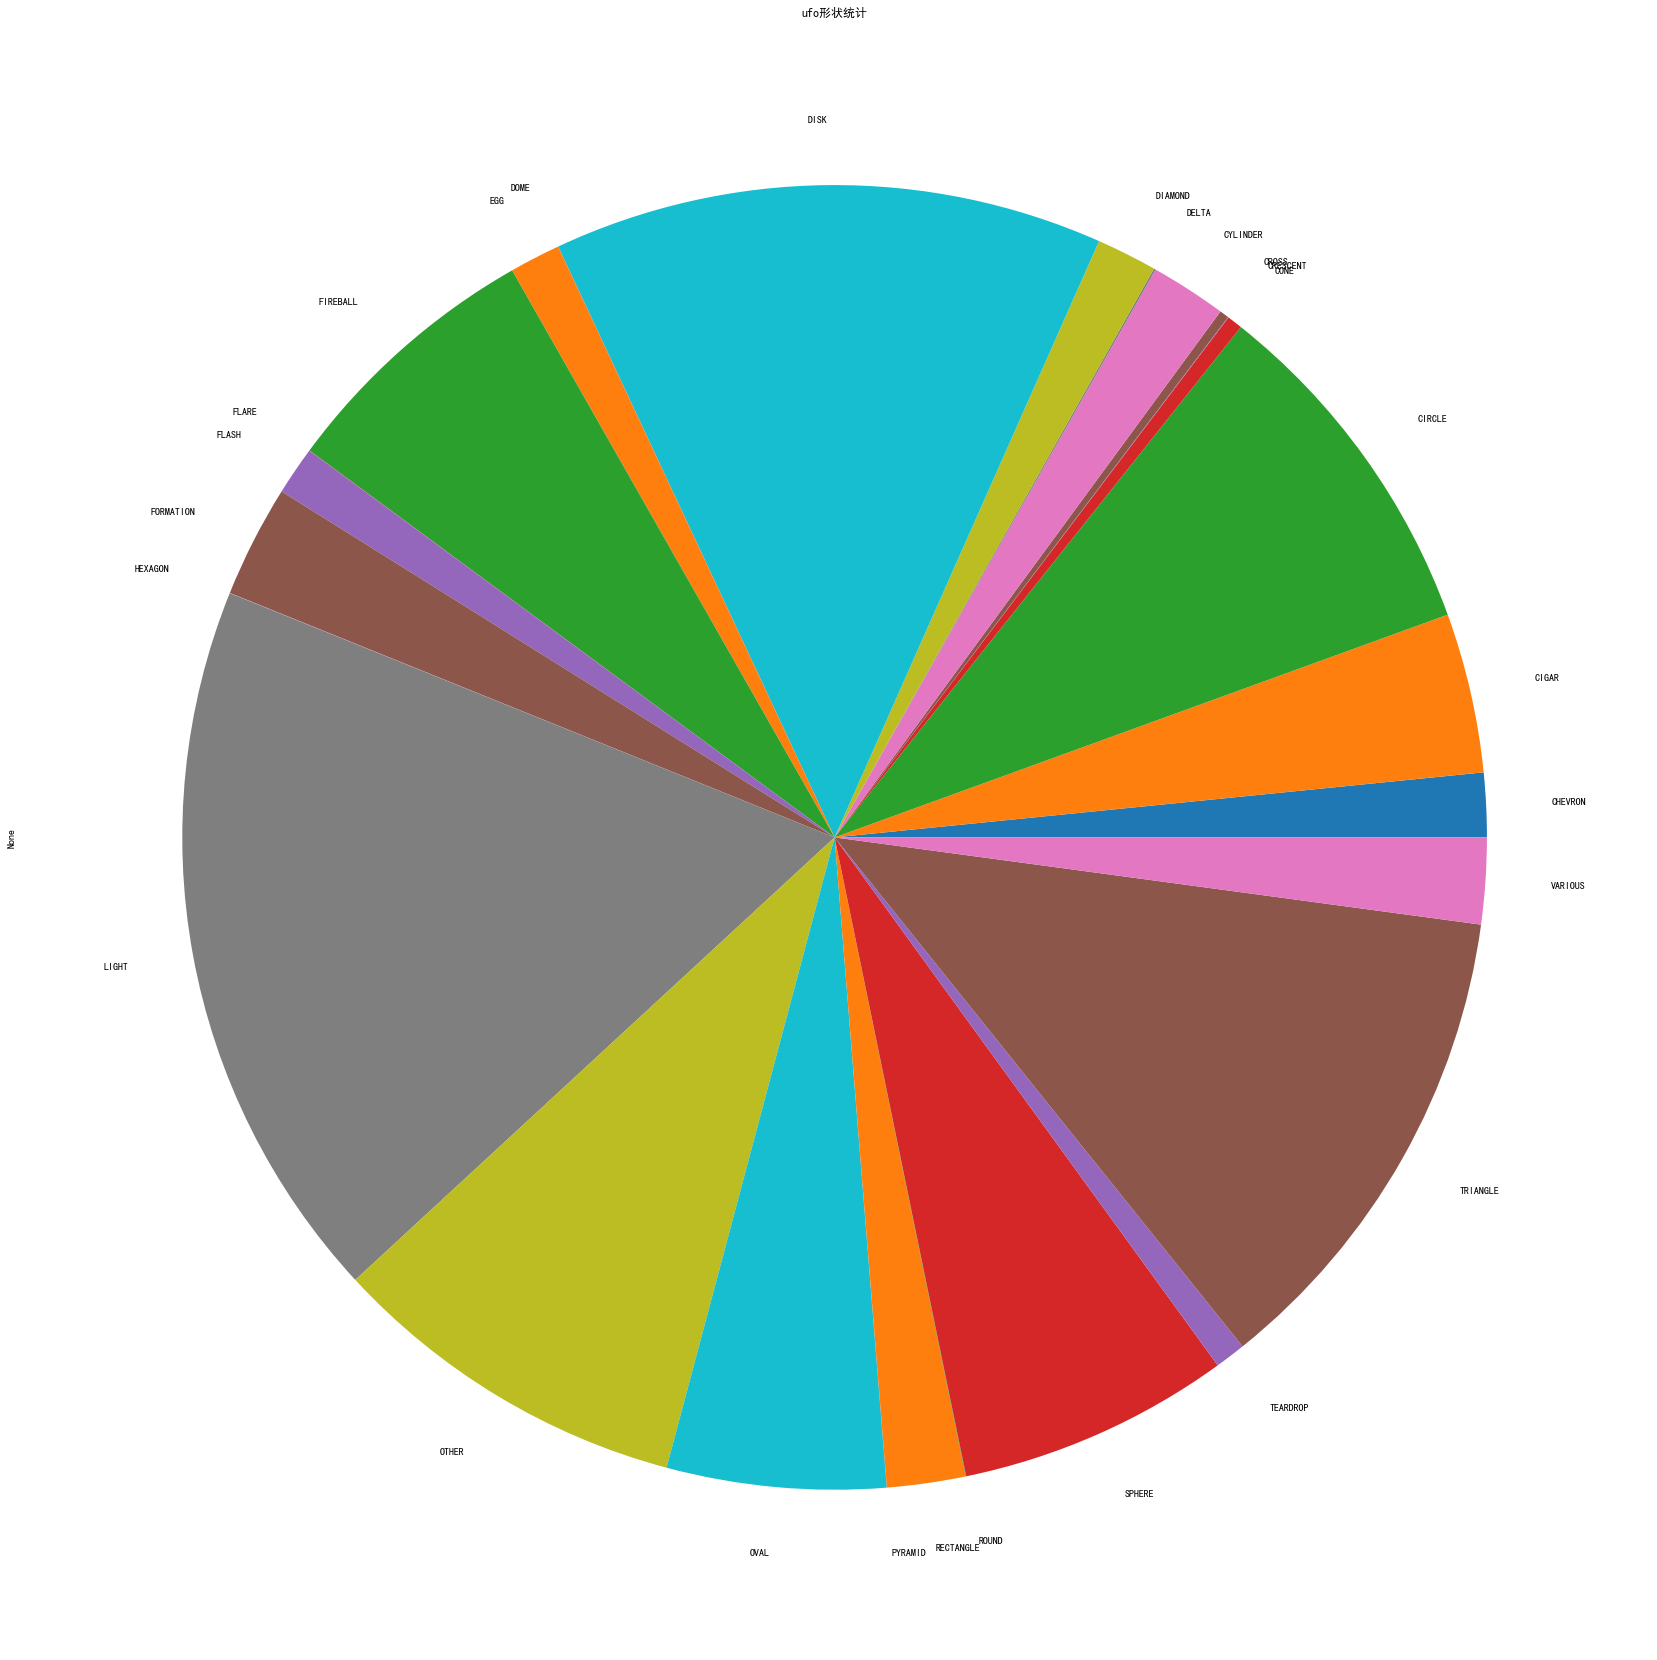

In [27]:
plt.figure(figsize=(30,30))
ufo_shape=ufo.groupby("Shape Reported").size()
ufo_shape.plot(kind="pie",title="ufo形状统计")

In [28]:
ufo_shape.index

Index(['CHEVRON', 'CIGAR', 'CIRCLE', 'CONE', 'CRESCENT', 'CROSS', 'CYLINDER',
       'DELTA', 'DIAMOND', 'DISK', 'DOME', 'EGG', 'FIREBALL', 'FLARE', 'FLASH',
       'FORMATION', 'HEXAGON', 'LIGHT', 'OTHER', 'OVAL', 'PYRAMID',
       'RECTANGLE', 'ROUND', 'SPHERE', 'TEARDROP', 'TRIANGLE', 'VARIOUS'],
      dtype='object', name='Shape Reported')

In [29]:
ufo_years_shapes=ufo.groupby("Shape Reported").resample("5A").size()
ufo_years_shapes=ufo_years_shapes.reset_index()

In [30]:
ufo_years_shapes=ufo_years_shapes.rename(columns={0:"num","Time":"Period"})

In [31]:
# ufo_years_shapes=ufo_years_shapes.pivot_table(values="num",index="State",columns="Period")


In [32]:
ufo_years_shapes.fillna(0,inplace=True)

In [33]:
ufo_years_shapes["Period"]=ufo_years_shapes["Period"].dt.year

In [34]:
plt.rcParams['font.sans-serif'] = ['SimHei']

In [35]:
a = ['#FFFFCC  #FFCC00  #CC9909  #663300  #FF6600  #663333  #CC6666  #FF6666  #FF0000  #FFFF99  #FFCC66  #FF9900  #FF9966  #CC3300  #996666  #FFCCCC  #660000  #FF3300  #FF6666  #FFCC33  #CC6600  #FF6633  #996633  #CC9999  #FF3333  #990000  #CC9966  #FFFF33  #CC9933  #993300  #FF9933  #330000  #993333  #CC3333  #CC0000  #FFCC99  #FFFF00  #996600']
b =' '.join(a)
c = b.split("  ")
c
import random
color=random.sample(c,27)
shape=list(ufo_years_shapes["Shape Reported"].unique())
colors=dict(zip(shape,color))

In [36]:
my_font = font_manager.FontProperties(fname=r"C:\Windows\Fonts\msyh.ttc",size=14)

In [37]:

f=open('.\\sources\\ufoInformation.txt',encoding='utf-8')
txt=""
for line in f:
    txt=txt+line.strip()
words = jieba.lcut(txt)                                        #精确分词
newtxt = ' '.join(words)                                       #空格拼接
wordcloud = WordCloud(font_path="msyh.ttc").generate(newtxt)   #生成词云，font_path="msyh.ttc"为选择微软雅黑字体
image = wordcloud.to_image()
# image.save('.\\wordcloud.jpg')
# image.show()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\xzy12\AppData\Local\Temp\jieba.cache
Loading model cost 0.782 seconds.
Prefix dict has been built successfully.


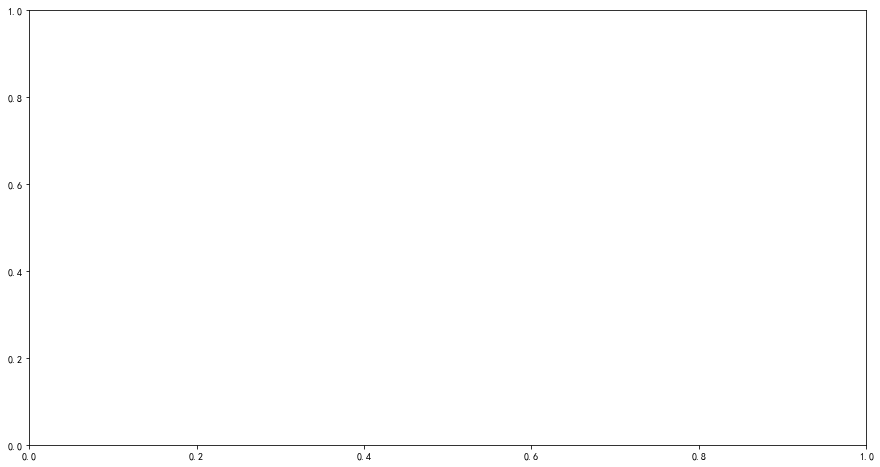

In [38]:
fig,ax=plt.subplots(figsize=(15,8))
def drawPath(year):
    # ansData=(ufo_years_shapes[ufo_years_shapes["Period"]==current_year].sort_values(by="num",ascending=True).tail(10))
    # fig,ax=plt.subplots(figsize=(15,8))
    # ax.barh(ansData["Shape Reported"],ansData["num"])
    # current_year=1990
    ansData=(ufo_years_shapes[ufo_years_shapes["Period"]==year].sort_values(by="num",ascending=True).tail(10))
    ax.clear()
    ax.barh(ansData["Shape Reported"],ansData["num"],color=[colors[x] for x in ansData["Shape Reported"]])
    for i,(number,shape) in enumerate(zip(ansData["num"],ansData["Shape Reported"])):
        ax.text(number,i,shape,ha='right',fontproperties=my_font)
        ax.text(number,i,f':{number}',ha='left',fontproperties=my_font)
    ax.text(1,0.4,year,transform=ax.transAxes,size=40,ha='right',fontproperties=my_font)
    # x刻度设置在顶部
    ax.xaxis.set_ticks_position('top')
    # x刻度颜色设置为灰色，大小为12
    ax.tick_params(axis= 'x',colors= '#777777',labelsize= 12)
    # 去掉y刻度
    ax.set_yticks([])
    # 设置 xy轴内边距
    ax.margins(0, 0.01)
    # 显示网格（x轴向虚线）
    ax.grid(which= 'major', axis= 'x',linestyle= '--')
    # 网格线至于底部
    ax.set_axisbelow(True)
    # 在左上角显示 标题（不是用的title方法）
    ax.text(0, 1.06,'美国各种形状UFO的报告',transform= ax.transAxes,weight =600,ha = 'left',fontproperties= my_font,size=24)
    # 去掉边框
    plt.box(False)
# drawPath(1986)

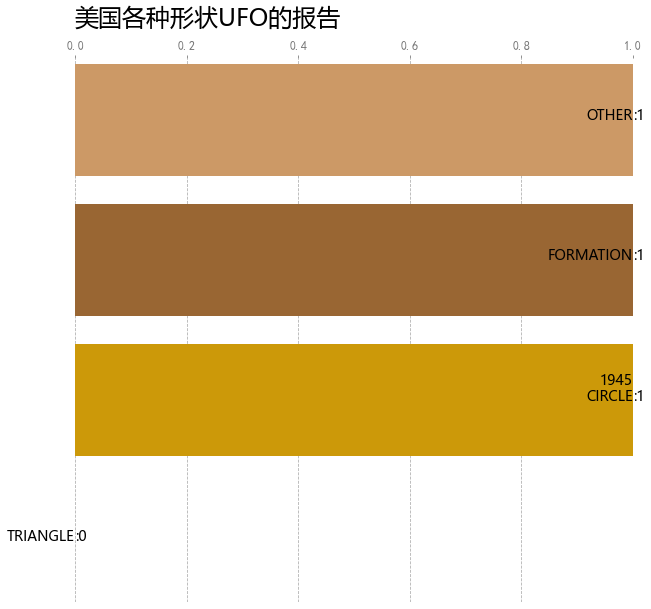

In [39]:
fig,ax=plt.subplots(figsize = (10,10))
animator = FuncAnimation(fig,drawPath,frames=range(1945,2001),interval=1000)
HTML(animator.to_jshtml())
# animator.save(".\\ufo.gif",writer='imagemagick')


In [40]:
ufo_years_shapes[ufo_years_shapes.Period == 2004].sort_values(by="num",ascending=True)

,Shape Reported,Period,num
91,DIAMOND,2004,46
269,VARIOUS,2004,68
233,SPHERE,2004,122
132,FIREBALL,2004,205


In [41]:
# external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
# app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

# app.layout = html.Div([
#     html.H1("每年所看到的UFO形状动态演示", style={"text-align":"center","color":"blue"}),
#     dcc.Graph(id="graph-with-slider"),
#     dcc.Slider(
#         id = "year-slider",
#         min = 1994,
#         max = 2004,
#         value = ufo_years_shapes["Period"].min(),  # 范围和初始值
#         marks = {str(year):str(year) for year in ufo_years_shapes["Period"]},  # 滑动条下每个年份数字，改成字符型数据
# #         step =5  # 步长
#     )
# ])

# @app.callback(
#     Output("graph-with-slider","figure"),  # 输出与输入，和上面的名称一一对应
#     [Input("year-slider","value")]
# )

# def update_figure(selected_year):  # 生成画图需要的数据
#     filtered_df = (ufo_years_shapes[ufo_years_shapes.Period == selected_year].sort_values(by="num",ascending=False)).head(10)  # 将指定年份的数据选择出来
#     traces = [{'x':filtered_df["Shape Reported"],'y':filtered_df.num,'type':'bar','name':'数量'}]
#     return {   # 返回的内容
#         "data":traces,  # 数据必须是列表形式，列表中的元素是字典的键值对
#         "layout":dict(yaxis={"range":[0,ufo_years_shapes["num"].max()],"title":"数量"},xaxis={"title":"形状"})
#     }

In [42]:
ufo_years_shapes["num"].max()

1077

In [43]:
 lay={ 'autosize': False,'width': 1500,'height': 500,'margin': { 'l': 50,
    'r': 50,
    'b': 100,
    't': 100,
    'pad': 4
  }
    }

In [44]:
ufo_shape_dash=ufo_shape.sort_values(ascending=False).head(10)

In [45]:
ufo_shape_dash

Shape Reported
LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
dtype: int64

In [46]:
fig = go.Figure(data=[go.Scatter(x=x_array, y=np.array(ufo_open.num),mode='markers',name="UFO数量"),go.Scatter(x=x_array,y=yvals_f1,mode='lines',name="b^x函数拟合"),go.Scatter(x=x_array,y=yvals_f2,mode="lines",name="x^2函数拟合")])
app = dash.Dash('Hello UFO', )
app.layout = html.Div(
    children = [
        html.H1('各州所看到的UFO数',style= {"text-align":"center","color":"blue"}),
        dcc.Graph(
            id='example-graph',
            figure = dict(
                data = [{'x': ufo_where.index, 'y': ufo_where, 'type': 'bar', 'name': '数量'}]
            )
        ),
        
        html.H1( '每5年所看到的UFO数目以及函数拟合', style={"text-align":"center","color":"blue"}),
        dcc.Graph(
        id='example-graph-2',
        figure=fig
        ),
        html.H1("每年所看到的UFO形状交互演示（部分）", style={"text-align":"center","color":"blue"}),
        dcc.Graph(id="graph-with-slider"),
        dcc.Slider(
            id = "year-slider",
            min = 1990,
            max = 2004,
            value =1990,  # 范围和初始值
            marks = {str(year):str(year) for year in ufo_years_shapes["Period"]},  # 滑动条下每个年份数字，改成字符型数据
#         step =5  # 步长
        ),
        html.H1("目击UFO形状占比(部分)",style={"text-align":"center","color":"blue"}),
        dcc.Graph(
            id="shape",
            figure=go.Figure(data=[go.Pie(labels=ufo_shape_dash.index,values=ufo_shape_dash,name="占比")])
        ),
        html.H1("根据UFO消息生成词云",style={"text-align":"center","color":"blue"}),
        html.Img(
            src=Image.open(".\\wordcloud.jpg")
        )

    ]
)
@app.callback(
    Output("graph-with-slider","figure"),  # 输出与输入，和上面的名称一一对应
    [Input("year-slider","value")]
)

def update_figure(selected_year):  # 生成画图需要的数据
    filtered_df = (ufo_years_shapes[ufo_years_shapes.Period == selected_year].sort_values(by="num",ascending=False)).head(10)  # 将指定年份的数据选择出来
    traces = [{'x':filtered_df["Shape Reported"],'y':filtered_df.num,'type':'bar','name':'数量'}]
    return {   # 返回的内容
        "data":traces,  # 数据必须是列表形式，列表中的元素是字典的键值对
        "layout":dict(yaxis={"range":[0,ufo_years_shapes["num"].max()],"title":"数量"},xaxis={"title":"形状"})
    }

In [47]:
app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "Hello UFO" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off
 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [22/Jun/2021 21:43:55] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Jun/2021 21:43:55] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [22/Jun/2021 21:43:56] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [22/Jun/2021 21:43:56] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [22/Jun/2021 21:44:01] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [22/Jun/2021 21:44:03] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [22/Jun/2021 21:44:05] "POST /_dash-update-component HTTP/1.1" 200 -
